# Sales Analysis

- Summary
- Top customers
- Montly revenue
- Top Refunds

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

ROOT = Path().resolve().parent
parquet_path = ROOT / "data" / "clean" /"2024_clean.parquet"
df = pd.read_parquet(parquet_path)

## Summary

- **Data types** → checks data type per column  
- **Non-null values** and **Null count** → count of missing values
- **Distinct values** → useful for IDs (e.g., distinct customers, invoices)  
- **Min / Max** → sanity check for monetary ranges  
- **Mean / Median** → compare overall average vs. typical invoice size

In [ ]:
cols = df.columns
summary = pd.DataFrame({
    "dtype": df.dtypes.astype(str),
    "non_null": df.notna().sum(), 
    "null_count": df.isna().sum(),
    "distinct": df.nunique(dropna=True),
    "min": df.apply(lambda s: s.min() if pd.api.types.is_numeric_dtype(s) else pd.NA),
    "max": df.apply(lambda s: s.max() if pd.api.types.is_numeric_dtype(s) else pd.NA),
    "mean": df.apply(lambda s: s.mean().round() if pd.api.types.is_numeric_dtype(s) else pd.NA),
    "median": df.apply(lambda s: s.median().round() if pd.api.types.is_numeric_dtype(s) else pd.NA),
}, index=cols)
summary

,dtype,non_null,null_count,distinct,min,max,mean,median
delivery_note,int64,40128,0,40128,1,40273,20129.0,20126.0
date,datetime64[ns],40128,0,307,<NA>,<NA>,<NA>,<NA>
customer_id,int64,40128,0,1762,5,5470,2592.0,2811.0
amount,float64,40110,18,13286,-2124.96,10532.58,76.0,24.0
vat,float64,40110,18,6444,-446.24,2211.84,16.0,5.0
total,float64,40110,18,13309,-2571.2,12744.42,92.0,30.0
invoice_num,int64,40128,0,10311,1,10319,5024.0,5046.0


## Top 10 Customers by Revenue

In [ ]:
top_customers = (
    df.groupby("customer_id", as_index=False)["total"]
      .sum()
      .sort_values("total", ascending=False)
      .head(10)
      .reset_index(drop=True)
)
top_customers.index = top_customers.index + 1

top_customers

,customer_id,total
1,3528,231036.09
2,1891,134833.29
3,4242,128946.70
4,5171,121550.72
5,1470,102827.97
6,2310,87708.41
7,215,78716.70
8,2985,77127.77
9,266,69330.17
10,4313,53715.95


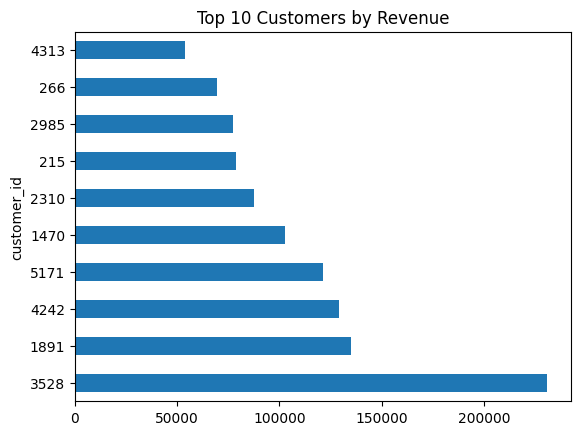

In [ ]:
top_customers.plot(kind="barh", x="customer_id", y="total", legend=False)
plt.title("Top 10 Customers by Revenue")
plt.show()

## Monthly Revenue Trend

In [ ]:
df["month"] = df["date"].dt.to_period("M").dt.to_timestamp()
monthly = (
    df.groupby("month", as_index=False)["total"]
      .sum()
      .reset_index(drop=True)
)

monthly.index = monthly.index + 1
monthly

,month,total
1,2024-01-01,281678.51
2,2024-02-01,281852.30
3,2024-03-01,292444.39
4,2024-04-01,304232.25
5,2024-05-01,371680.88
6,2024-06-01,346149.05
7,2024-07-01,365436.66
8,2024-08-01,230543.54
9,2024-09-01,305119.09
10,2024-10-01,333856.50


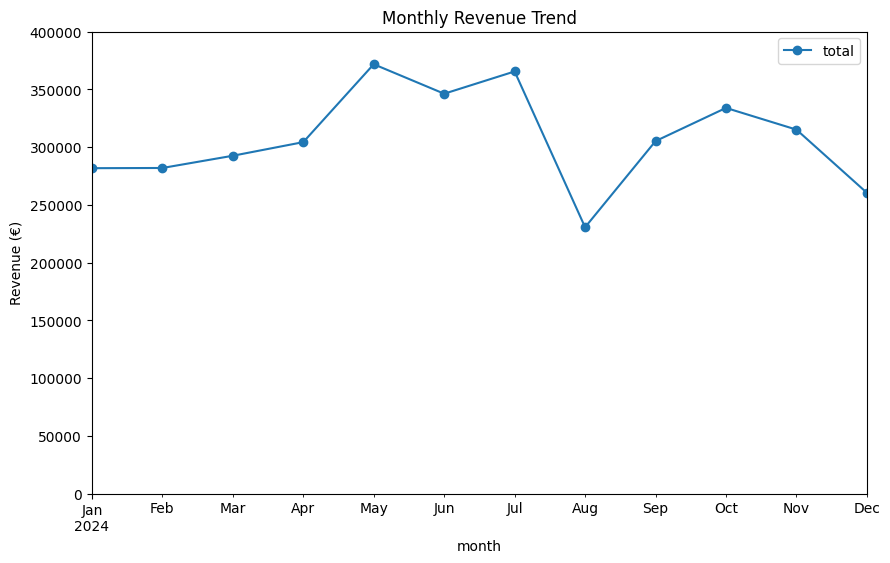

In [ ]:

monthly.plot(
    x="month",
    y="total",
    kind="line", 
    marker="o",
    figsize=(10, 6)
)
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue (€)")

ymax = int(monthly["total"].max())
ticks = list(range(0, ymax + 50000, 50000))
plt.yticks(ticks)

plt.show()

## Top Refunds per Customer

In [ ]:
refunds = df[df["total"] < 0].copy()
refunds_summary = (
    refunds.groupby("customer_id", as_index=False)["total"]
           .sum()
           .sort_values("total")
)
refunds_summary.head()

,customer_id,total
167,4242,-8206.03
23,302,-2796.70
135,3165,-2355.05
164,4091,-2303.07
47,654,-1693.65


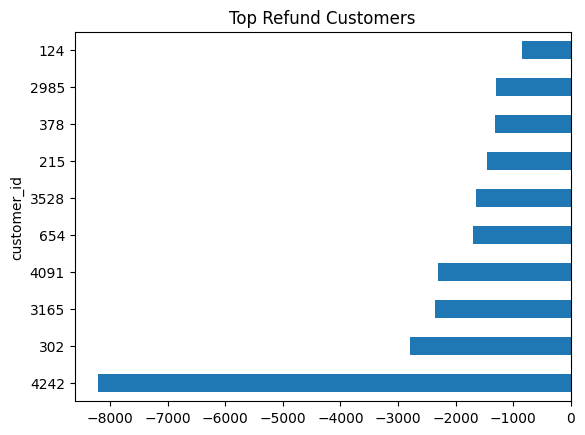

In [86]:
refunds = df[df["total"] < 0]

if refunds.empty:
    print("No refunds found in this dataset.")
else:
    refunds_summary = (
        refunds.groupby("customer_id", as_index=False)["total"]
        .sum()
        .sort_values("total")
    )
    
    refunds_summary.head(10).plot(
        kind="barh",
        x="customer_id",
        y="total",
        legend=False
    )
    plt.title("Top Refund Customers")
    plt.show()